# Linear Regression to Predict Restaraunt Profits

Machine Learning on Coursera week 1 exercise includes linear regression to predict food truck profits. The data contains the population of a city, and the profit generated by a food truck in that city. Our goal is to use this data so that given the population, we are able to predict the profit generated by a food truck in that city.
## Part 1: Getting the Data

In [8]:
import matplotlib.pyplot as plt
import numpy as np

path = '/Users/archit-p/sources/coursera/machine-learning/machine-learning-ex1/ex1/ex1data1.txt'

In [9]:
f = open(path, 'r')

dataset = []

for line in f:
    fields = line.strip().split(',')
    fields[0] = float(fields[0])
    fields[1] = float(fields[1])
    dataset.append(fields)

In [10]:
dataset[0:5]

[[6.1101, 17.592],
 [5.5277, 9.1302],
 [8.5186, 13.662],
 [7.0032, 11.854],
 [5.8598, 6.8233]]

In [11]:
# number of features
n = len(dataset[0]) - 1

# number of datapoints
m = len(dataset)

x = np.ones(shape=(m, n + 1))
y = np.zeros(m)

for i, d in enumerate(dataset):
    for j in range(n):
        x[i][1 + j] = dataset[i][j]
        y[i] = dataset[i][-1]

for j in range(n):
    x[:, 1+j] = (x[:, 1+j] - np.ones(m) * x[:, 1+j].mean()) / x[:, 1+j].std()

In [12]:
x[0:5]

array([[ 1.        , -0.53240565],
       [ 1.        , -0.68368294],
       [ 1.        ,  0.09319761],
       [ 1.        , -0.30042464],
       [ 1.        , -0.5974206 ]])

In [13]:
y[0:5]

array([17.592 ,  9.1302, 13.662 , 11.854 ,  6.8233])

Plotting the data over a scatter plot gives us an idea of the distribution.

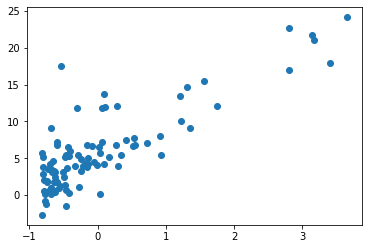

In [14]:
plt.scatter(x[:, 1], y)
plt.show()

## Part 2: Regression and Gradient Descent
In Part 2, we define the hypothesis, error and gradient functions and perform the minimization.

In [15]:
def hypothesis(theta, xi):
    return np.matmul(np.transpose(theta), xi)

In [16]:
def mse(theta):
    sum = 0
    predictions = np.zeros(m)
    for i, xi in enumerate(x):
        predictions[i] = hypothesis(theta, xi)
    return ((predictions - y) ** 2).mean() / 2;

In [17]:
mse(np.array([0, 0]))

32.072733877455676

In [18]:
def derivative(theta, j):
    sum = 0
    for xi, yi in zip(x, y):
        sum += (hypothesis(theta, xi) - yi) * xi[j]
    return sum / m

In [19]:
derivative(np.zeros(n + 1), 0)

-5.83913505154639

We minimize the cost function using a gradient descent algorithm.

In [20]:
%%time
theta = np.zeros(n + 1)
iterations = 2000
alpha = 0.02

h = np.zeros(iterations)
for i in range(iterations):
    newtheta = np.zeros(n + 1)
    for j in range(n + 1):
        newtheta[j] = theta[j] - alpha * derivative(theta, j)
    theta = newtheta
    h[i] = mse(theta)

print(theta)

[5.83913505 4.59304113]
CPU times: user 1.6 s, sys: 8.92 ms, total: 1.61 s
Wall time: 1.62 s


In order to check whether the gradient descent is convering, we plot the value of the cost function after each iteration.

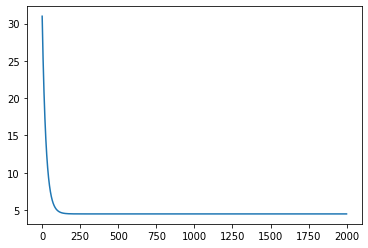

In [21]:
plt.plot(h)
plt.show()

## Part 3: Visualizing the Cost Function

In Part 3, we visualize the cost function to know whether it is a convex function. For this we use a contour plot and a surface plot of cost function values over a given grid.

In [22]:
%%time
theta0_vals = np.arange(4, 8, 0.1)
theta1_vals = np.arange(3, 6, 0.1)

cost = np.zeros(shape=(len(theta1_vals), len(theta0_vals)))

for i, t1 in enumerate(theta1_vals):
    for j, t0 in enumerate(theta0_vals):
        cost[i][j] = mse(np.array([t0, t1]))

CPU times: user 313 ms, sys: 4.4 ms, total: 317 ms
Wall time: 316 ms


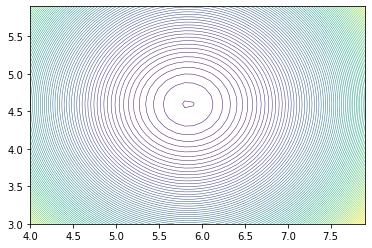

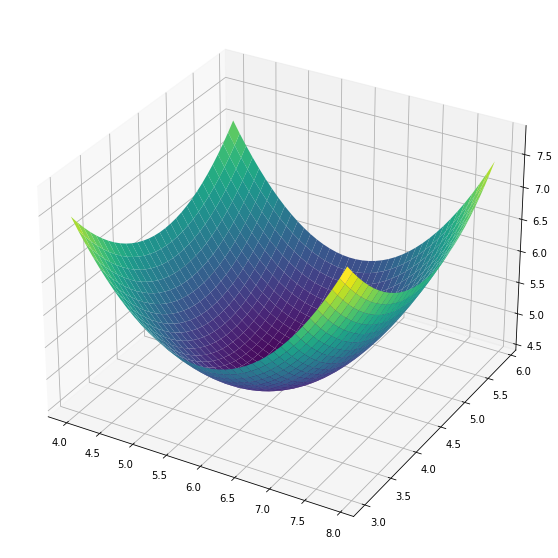

In [23]:
# create contour plot
x_grid, y_grid = np.meshgrid(theta0_vals, theta1_vals)
plt.contour(x_grid, y_grid, cost, levels=100, cmap='viridis', linewidths=0.5)
plt.show()

# create surface plot
fig = plt.figure(figsize=(10, 10))
ax = plt.axes(projection='3d')

ax.plot_surface(x_grid, y_grid, cost, cmap='viridis')
plt.show()